## Logistic Regression

In [ ]:
import numpy as np

def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    yHat = ( 1 / 1 + np.exp(-x) )
    return yHat

def net_input(theta, x): ## returning z
    # Computes the weighted sum of inputs
    net = np.dot(theta,x)
    return net

def predict_prob(theta, x): 
  # Returns the probability after passing it through sigmoid "Y_hat"
	predicted_probs = sigmoid(net_input(theta,x))
	return predicted_probs

def fit(x, y):
    L = 0.001  # The learning Rate
    epochs = 200000  # The number of iterations to perform gradient descent
    theta = np.zeros((x.shape[1],1))

    m = len(x)
    for i in range(epochs):

      for row in x:
        y_pred = predict_prob(theta,x[row]) 

        theta = theta - L * ((1 / m) * sum(y_pred - y[row]) * x[row])

    return theta


def predict_classes(theta,x):

    if predict_prob(theta,x) > 0.5:
      predicted_classes = 1

    elif predict_prob(theta,x) < 0.5:
      predicted_classes = 0

    else:
      predicted_classes = None

    return predicted_classes

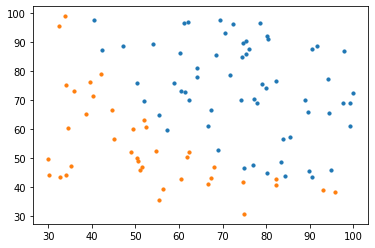

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


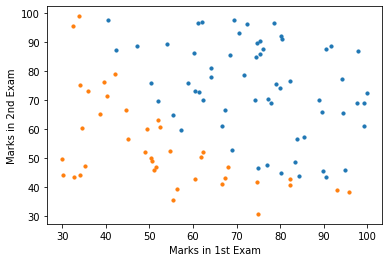

ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('marks.csv')
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[Y == 1]
# filter out the applicants that din't get admission
not_admitted = data.loc[Y == 0]

# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.show()

#prepare data to be fitted
X = np.c_[np.ones((X.shape[0], 1)), X]
Y = Y[:, np.newaxis]
theta = fit(X, Y)


#plot decision boundary
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
theta = theta.flatten()
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.show()

actual_classes = Y.flatten()
predicted_classes = predict_classes(theta,X)
predicted_classes = predicted_classes.flatten()
accuracy = np.mean(predicted_classes == actual_classes)
print(accuracy * 100)


## Decision Trees

Accuracy: 0.9667


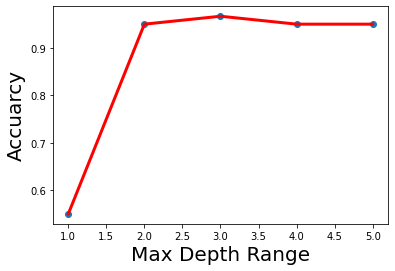

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import graphviz
import os

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=17)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))


dot = tree.export_graphviz(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot)
graph.format = 'png'
graph.render('iris', view=True)


# List of values to try for max_depth:
max_depth_range = list(range(1, 6))# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

plt.scatter(max_depth_range, accuracy)
plt.xlabel('Max Depth Range', fontsize = 20)
plt.ylabel('Accuarcy', fontsize = 20)
plt.plot(max_depth_range, accuracy, color='red', linewidth = 3)
plt.show()


## Adaboost

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
#import graphviz

dataset = pd.read_csv('iris.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=100)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

bdt.fit(X_train,y_train)
y_prediction = bdt.predict(X_test)
accuracy=np.mean(y_prediction == y_test)*100
print("The achieved accuracy using Adaboost is " + str(accuracy))
error = []
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X_train,y_train)
y_prediction = clf.predict(X_test)
accuracy=np.mean(y_prediction == y_test)*100
print("The achieved accuracy using Decision Tree is " + str(accuracy))


The achieved accuracy using Adaboost is 95.0
The achieved accuracy using Decision Tree is 65.0
